In [19]:
import numpy as np
import pandas as pd
import torch
import cv2
import os

In [3]:
img = cv2.imread('C:/Users/Lenovo/Documents/train/indoor/3.jpg')

In [4]:
img.shape

(100, 74, 3)

In [14]:
img[:,:,0]

array([[ 17,  17,  17, ...,  97, 106, 104],
       [ 17,  17,  17, ...,  92, 103, 101],
       [ 17,  17,  17, ...,  91,  96,  90],
       ...,
       [200, 192, 193, ..., 112,  89,  89],
       [200, 192, 193, ...,  99, 117, 117],
       [200, 192, 193, ..., 161, 165, 165]], dtype=uint8)

In [12]:
def get_metrics(img):
    image = cv2.imread(img)
    return {'r_mean':image[:,:,0].mean(),
     'g_mean':image[:,:,1].mean(),
     'b_mean':image[:,:,2].mean(),
     'r_std':image[:,:,0].std(),
     'g_std':image[:,:,1].std(),
     'b_std':image[:,:,2].std()}

['10.jpg',
 '10000.jpg',
 '10002.jpg',
 '10005.jpg',
 '10007.jpg',
 '10008.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10014.jpg',
 '10015.jpg',
 '10019.jpg',
 '1002.jpg',
 '10022.jpg',
 '10024.jpg',
 '10026.jpg',
 '10027.jpg',
 '1003.jpg',
 '10032.jpg',
 '10033.jpg',
 '10035.jpg',
 '10036.jpg',
 '10040.jpg',
 '10044.jpg',
 '10046.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10053.jpg',
 '10057.jpg',
 '10062.jpg',
 '10063.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10069.jpg',
 '10070.jpg',
 '10075.jpg',
 '10080.jpg',
 '10085.jpg',
 '10086.jpg',
 '10088.jpg',
 '10093.jpg',
 '10094.jpg',
 '10098.jpg',
 '10099.jpg',
 '101.jpg',
 '1010.jpg',
 '10101.jpg',
 '10102.jpg',
 '10103.jpg',
 '10108.jpg',
 '10109.jpg',
 '10111.jpg',
 '10112.jpg',
 '10115.jpg',
 '10117.jpg',
 '10118.jpg',
 '1012.jpg',
 '10121.jpg',
 '10123.jpg',
 '10129.jpg',
 '10131.jpg',
 '10132.jpg',
 '10136.jpg',
 '10138.jpg',
 '10140.jpg',
 '10146.jpg',
 '10147.jpg',
 '10148.jpg',
 '1015.jpg',
 '10151.jpg',
 '

In [24]:
X = []
y = []
for t in ['outdoor','indoor']:
    for f in os.listdir(f'C:/Users/Lenovo/Documents/train/{t}/'):
        y.append(t)
        X.append(get_metrics(f'C:/Users/Lenovo/Documents/train/{t}/{f}'))

In [25]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [26]:
X

,r_mean,g_mean,b_mean,r_std,g_std,b_std
0,120.204933,113.355200,111.845467,69.615602,67.475425,63.166613
1,119.921867,145.957333,158.262000,64.016461,44.628162,40.332452
2,142.928929,143.582321,145.185000,73.326685,65.974121,61.175384
3,64.447733,64.736000,76.484000,61.955774,59.838468,56.268055
4,162.511375,138.965500,125.129500,62.252194,53.351502,49.584261
...,...,...,...,...,...,...
55317,116.956667,123.829067,129.296400,60.969206,60.681234,57.488299
55318,96.647746,103.221127,121.114648,68.483365,71.172709,65.826191
55319,88.718136,107.363729,94.892881,73.270044,75.070868,70.590882
55320,129.872533,139.917333,143.426667,31.530781,30.617983,29.671627


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold

In [34]:
y = y.replace({'outdoor':0,'indoor':1})

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

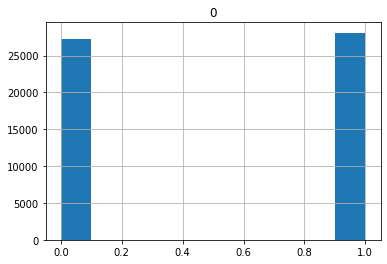

In [35]:
y.hist()

In [28]:
model = LogisticRegression()

In [36]:
cross_val_score(model,X,y,scoring='accuracy',n_jobs=-1,verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished


array([0.79792137, 0.80018075, 0.79681851, 0.79925886, 0.79455893])

In [42]:
from scipy.stats import mode,skew,kurtosis

In [65]:
img[:,:,0]

array([[ 17,  17,  17, ...,  97, 106, 104],
       [ 17,  17,  17, ...,  92, 103, 101],
       [ 17,  17,  17, ...,  91,  96,  90],
       ...,
       [200, 192, 193, ..., 112,  89,  89],
       [200, 192, 193, ...,  99, 117, 117],
       [200, 192, 193, ..., 161, 165, 165]], dtype=uint8)

In [66]:
np.percentile(img[:,:,0],axis=None,q=1)

2.989999999999995

In [84]:
def get_metrics_new(img):
    image = cv2.imread(img)
    return {'r_mean':image[:,:,0].mean(),
     'g_mean':image[:,:,1].mean(),
     'b_mean':image[:,:,2].mean(),
     'r_std':image[:,:,0].std(),
     'g_std':image[:,:,1].std(),
     'b_std':image[:,:,2].std(),
     'r_var':image[:,:,0].var(),
     'g_var':image[:,:,1].var(),
     'b_var':image[:,:,2].var(),
     'r_mode':mode(np.asarray(image).reshape(-1,3)[0][0]),
     'g_mode':mode(np.asarray(image).reshape(-1,3)[1][0]),
     'b_mode':mode(np.asarray(image).reshape(-1,3)[2][0]),
     'r_skew':skew(np.asarray(image).reshape(-1,3)[0]),
     'g_skew':skew(np.asarray(image).reshape(-1,3)[1]),
     'b_skew':skew(np.asarray(image).reshape(-1,3)[2]),
     'r_kurtosis':kurtosis(np.asarray(image).reshape(-1,3)[0]),
     'g_kurtosis':kurtosis(np.asarray(image).reshape(-1,3)[1]),
     'b_kurtosis':kurtosis(np.asarray(image).reshape(-1,3)[2]),
     'r_p1':np.percentile(np.asarray(image).reshape(-1,3)[0],axis=None,q=1),
     'g_p1':np.percentile(np.asarray(image).reshape(-1,3)[1],axis=None,q=1),
     'b_p1':np.percentile(np.asarray(image).reshape(-1,3)[2],axis=None,q=1),
     'r_p99':np.percentile(np.asarray(image).reshape(-1,3)[0],axis=None,q=99),
     'g_p99':np.percentile(np.asarray(image).reshape(-1,3)[1],axis=None,q=99),
     'b_p99':np.percentile(np.asarray(image).reshape(-1,3)[2],axis=None,q=99),
            }

In [85]:
X_new = []
y_new = []
for t in ['outdoor','indoor']:
    for f in os.listdir(f'C:/Users/Lenovo/Documents/train/{t}/'):
        y_new.append(t)
        X_new.append(get_metrics_new(f'C:/Users/Lenovo/Documents/train/{t}/{f}'))

In [86]:
X_new = pd.DataFrame(X_new)
y_new = pd.DataFrame(y_new)

In [109]:
X_new['r_mode'] = X_new['r_mode'].apply(lambda x:int(x[0]))
X_new['g_mode'] = X_new['g_mode'].apply(lambda x:int(x[0]))
X_new['b_mode'] = X_new['b_mode'].apply(lambda x:int(x[0]))

In [111]:
cross_val_score(model,X_new,y_new,n_jobs=-1,verbose=1,cv=KFold(shuffle=True,random_state=23)).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


0.8190413464249738